In [1]:
!pip install seaborn --upgrade

    100% |████████████████████████████████| 215kB 27.0MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


# Lecture 10: Gibbs distribution for a single spin in an external magnetic field

The energy of a particle with magnetic moment $\mathbf{\mu}$ in a magnetic field $\mathbf{B}$ is given by

$$ E = -\mathbf{\mu}\cdot \mathbf{B}\,.$$

Let's consider a statistical model of a particle in an external magnetic field. To keep things simple, we'll assume that the magnetic field is oriented in a fixed direction, and that the magnetic moment of the particle can be either aligned or anti-aligned with the magnetic field. In statistical physics models, these particles are often called **spins**.

Mathematically, we could describe the orientation of the spin with a variable $\sigma \in \{-1, 1\}$. Let's assume that the magnetic field is oriented in the positive direction. The energy of the spin is then

$$ E(\sigma) = -\epsilon \sigma\,, $$

where $\epsilon = \mu B$. If we maintain the system with the spin at a constant temperature $T$, then the Gibbs distribution for the spin states $\sigma$ is

$$ P(\sigma) = \frac{e^{-E(\sigma)/T}}{Z} \,.$$

Here we've chosen units such that Boltzmann's constant $k_B=1$.

### Example: Coding the Gibbs distribution

Now let's write a function that returns $P(\sigma)$.

In [0]:
import numpy as np
import numpy.random as rng
import seaborn as sns
import matplotlib.pyplot as plt


def gibbs(eps, T):
    """ This function takes the energy eps and temperature T as input
        and returns the Gibbs distribution for a single spin as output """
    
    Z     = np.exp(-eps/T) + np.exp(eps/T)
    p_pos = np.exp( eps/T) / Z
    p_neg = np.exp(-eps/T) / Z
    
    return p_pos, p_neg

The magnetization is the average direction of the spin, given by

$$ m = \left\langle \sigma \right\rangle = \sum_{\sigma\in\{\pm 1\}} \sigma \frac{e^{\epsilon \sigma/T}}{Z} \,. $$ 

Let's use the Gibbs distribution above to compute the magnetization when $\epsilon=1$ and $T=1$.

In [2]:
p_pos, p_neg = gibbs(1, 1)

m = 1*p_pos - 1*p_neg # FILL THIS IN

print('The magnetization is %lf' % m)

The magnetization is 0.761594


And now, let's explore the dependence of the magnetization on the strength and direction of the external magnetic field $\mathbf{B}$. Because $\epsilon$ is directly proportional to $\mathbf{B}$, we can explore this behavior by manipulating $\epsilon$ directly. For this demonstration we'll set $T=1$.

*Aside*: In this simple case we can analytically write down the magnetization as a simple hyperbolic function.

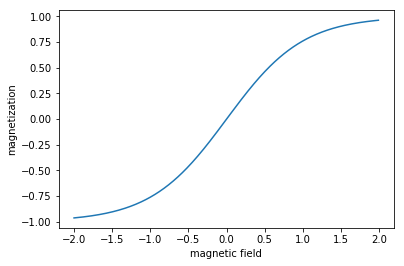

In [3]:
eps_values = np.arange(-2, 2, 0.01)
m_values   = []

for eps in eps_values:
    p_pos, p_neg = gibbs(eps, 1)
    m_values.append( p_pos - p_neg )
    
sns.lineplot(eps_values, m_values)
plt.xlabel('magnetic field')
plt.ylabel('magnetization');

**Exercise**: Explore the behavior of the magnetization as a function of the temperature when the strength of the magnetic field is fixed such that $\epsilon = 1$. What do you expect to observe? 

**Note**: You might want to use a logarithmic scale for the temperature range. You can do this with the `logspace` function from `numpy`. Calling `np.logspace(start, end, num)` will return an array of `num` numbers from $10^{\rm{start}}$ to $10^{\rm{end}}$ that are evenly spaced on a log scale.

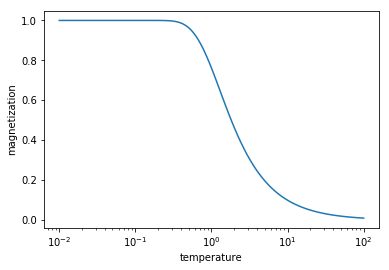

In [4]:
import numpy as np

eps      = 1
T_values = np.logspace(-2, 2, 100) # FILL THIS IN
m_values = []

# Loop through the T values to fill in magnetizations!
for T in T_values:
  p_pos, p_neg = gibbs(eps, T)
  m_values.append( p_pos - p_neg )
    
sns.lineplot(T_values, m_values)
plt.xscale('log')
plt.xlabel('temperature')
plt.ylabel('magnetization');

### Tracking the energy and entropy

Recall that for this system the energy function $E(\sigma)$ is

$$
E(\sigma) = -\epsilon \sigma\,,
$$

so the average energy

$$ 
\bar{E} = \langle E(\sigma) \rangle = \sum_\sigma E(\sigma) P(\sigma)\,.
$$

The entropy is given by

$$
S = -\sum_{\sigma} P(\sigma) \log P(\sigma)\,.
$$

How does changing the temperature affect the balance between the average energy and the entropy? We can plot how these change with the temperature below. For this analysis let's fix $\epsilon=1$.

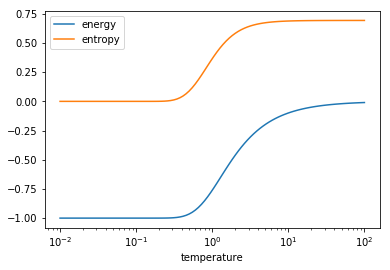

In [6]:
eps = 1

T_values = np.logspace(-2, 2, 100) # FILL THIS IN
E_values = []
S_values = []

# Loop through the T values to fill E and S

for T in T_values:
    p_pos, p_neg = gibbs(eps, T)
    E_values.append( (-eps*p_pos) + (eps*p_neg) ) # FILL IN, average energy at this temperature
    S_values.append( -(p_pos*np.log(p_pos)) - (p_neg*np.log(p_neg)) )  # FILL IN, entropy at this temperature
    
sns.lineplot(T_values, E_values, label='energy')
sns.lineplot(T_values, S_values, label='entropy')
plt.xscale('log')
plt.xlabel('temperature');

### Multiple spins

What if, instead of a single spin, we had several? Because the spins are noninteracting, the Gibbs distribution for $P(\underline{\sigma})$ is actually a product distribution, 

$$
P(\underline{\sigma}) = P(\sigma_1)\times P(\sigma_2) \times \ldots \times P(\sigma_N)\,.
$$

In that case, the probability of having a configuration with $n$ spins up and $N-n$ spins down is [binomial](https://en.wikipedia.org/wiki/Binomial_distribution),

$$
P(n) = \binom{N}{n} p^n (1-p)^{N-n} = \frac{N!}{n!(N-n)!} p^n (1-p)^{N-n}\,,
$$

where $p = P(\sigma_i = 1)$ is the probability that a single spin is up. We can compute this probability easily in Python using the `scipy.stats.binom` class.

In the space below, we can examine how the total energy and magnetization of a system of 10 spins changes with temperature.

In [0]:
import scipy

N   = 10
eps = 1

T_values = # FILL THIS IN
E_values = []
m_values = []

for T in T_values:
    p_pos, p_neg = gibbs(eps, T)
    
    avg_E = 0
    avg_m = 0
    for n in range(N+1):
        p_i = scipy.stats.binom.pmf(n, N, p_pos)
        avg_E += p_i * ((n * -eps) + ((N-n) * eps))
        avg_m += p_i * (n - (N-n))
    
    E_values.append(avg_E) # Compute average energy at this temperature
    m_values.append(avg_m) # Compute magnetization at this temperature
        
sns.lineplot(T_values, E_values, label='energy')
sns.lineplot(T_values, m_values, label='magnetization')
plt.xscale('log')
plt.xlabel('temperature');